In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.ensemble import  RandomForestClassifier ,GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics  import classification_report ,roc_auc_score



In [2]:
df= pd.read_csv("/content/Bank Customer Churn Prediction.csv")

In [ ]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_group,balance_to_salary_ratio
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,36-50,0.000000
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,36-50,0.744670
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,36-50,1.401362
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,36-50,0.000000
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,36-50,1.587035
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,36-50,0.759599
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0,36-50,0.000000
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,26-35,0.963961
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,36-50,1.895493
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,26-35,1.876621


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [6]:
df["customer_id"] .duplicated()

,customer_id
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


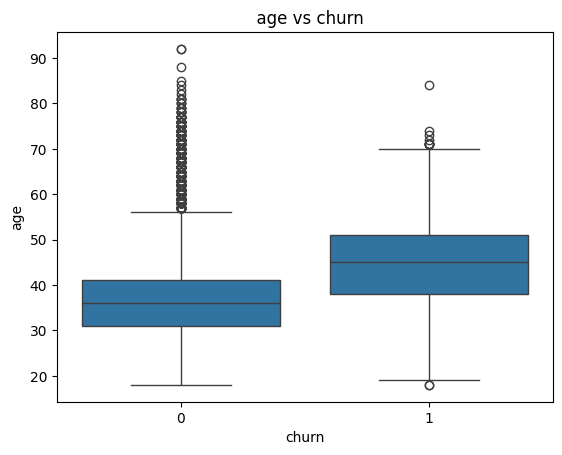

In [7]:
# visualization

# age vs churn

sns.boxplot( x="churn" , y="age" , data=df)
plt.xlabel("churn")
plt.ylabel("age")
plt.title("  age vs churn")
plt.show()

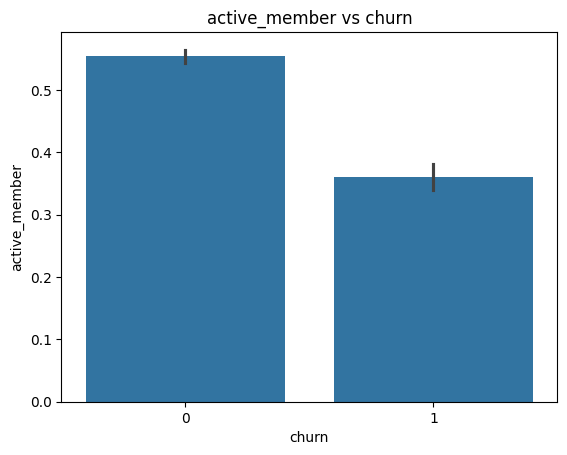

In [8]:
# 	active_member and churn
sns.barplot( x="churn" , y="active_member" , data=df)
plt.xlabel("churn")
plt.ylabel("active_member")
plt.title("active_member vs churn")
plt.show()


In [9]:
df.columns


Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [10]:
df["age_group"]=pd.cut(
    df["age"],
    bins=[0,18,25,35,50,100],
    labels=["0-18","19-25","26-35","36-50","51+"]


)

In [12]:
df["balance_to_salary_ratio"]= df["balance"]/(df["estimated_salary"]+1)

In [13]:
df["churn"].value_counts(normalize=True)

,proportion
churn,
0,0.7963
1,0.2037


In [14]:
from numpy import binary_repr
# feature categories

numerical_features=["age","balance","estimated_salary","balance_to_salary_ratio" ,"credit_score"]
categorical_features=["gender","credit_card","active_member","country","age_group"]


In [15]:
# training model

X = df.drop(columns=["churn", "customer_id"])
y = df["churn"]


In [16]:
print("X shape", X.shape)
print("y shape" , y.shape)

X shape (10000, 12)
y shape (10000,)


In [17]:
# column Transformer

preprocessor=ColumnTransformer(
    transformers=[
      ("numerical" ,StandardScaler(), numerical_features ),
      ( "categorical" , OneHotEncoder( handle_unknown="ignore" ,drop="first"), categorical_features) ,

    ]
)


In [18]:
 # train_test split

X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
# model logistic regression

log_reg_pipeline=Pipeline(
    steps=[
    ("preprocessor", preprocessor),
    ("classifier" ,LogisticRegression(max_iter=1000 , class_weight="balanced"))

    ]

)

In [20]:
# random forest

rf=Pipeline(
    steps=[
     ("preprocessor" , preprocessor),
     ("classifier" , RandomForestClassifier(
         n_estimators=200,
         random_state=42,
         class_weight="balanced"  ))
    ]
     )



In [21]:
# gradient boosting
gb=Pipeline(
    steps=[
        ("preprocessor" , preprocessor),
        ("classifier" , GradientBoostingClassifier(
            random_state=42
        ))
    ]
)



In [22]:
 #train and evaluate function



 def evaluate_model(model , X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  y_prob=model.predict_proba(X_test)[:,1]

  print(classification_report(y_test, y_pred))
  print("roc_auc_score" , roc_auc_score(y_test, y_prob))




In [23]:
 print("logistic regression model:")
 evaluate_model(log_reg_pipeline, X_train, X_test, y_train, y_test)

 print("random forest model:")
 evaluate_model(rf, X_train, X_test, y_train, y_test)

 print("gradient boosting model:")
 evaluate_model(gb, X_train, X_test, y_train, y_test)


logistic regression model:
              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1607
           1       0.38      0.74      0.50       393

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.71      0.74      2000

roc_auc_score 0.7849817354417933
random forest model:
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      1607
           1       0.69      0.32      0.44       393

    accuracy                           0.84      2000
   macro avg       0.77      0.64      0.67      2000
weighted avg       0.82      0.84      0.81      2000

roc_auc_score 0.7768018734829016
gradient boosting model:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.72      0.35      0.47       393

    accuracy                           0.84